In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# read Dataset 

In [2]:
wine_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
wine_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [3]:
wine_data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [4]:
wine_data.shape

(1599, 12)

In [5]:
wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [8]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
unique_value = wine_data.nunique().reset_index(name='Numbers of unique')
unique_value

,index,Numbers of unique
0,fixed acidity,96
1,volatile acidity,143
2,citric acid,80
3,residual sugar,91
4,chlorides,153
5,free sulfur dioxide,60
6,total sulfur dioxide,144
7,density,436
8,pH,89
9,sulphates,96


In [10]:
wine_data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# no null value presents
# in this dataset quality is label
# all features are in same datatype
# its a multiclass classification 
# n this dataset there are 6 quality of wines
# in residual sugar,free sulfurdioxide and total sulfurdioxide have large difference between 3 rd quartile and max 

In [ ]:
# visual or ghraphical data analysis

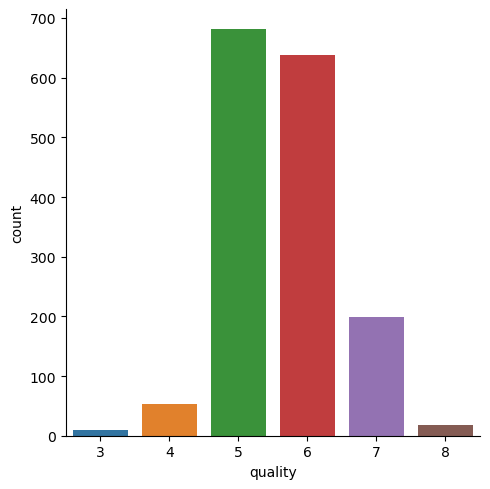

In [13]:
sns.catplot(x='quality',data=wine_data,kind='count')

In [ ]:
# 5 and 6 no quality count are more

In [14]:
correlation = wine_data.corr()

<Axes: >

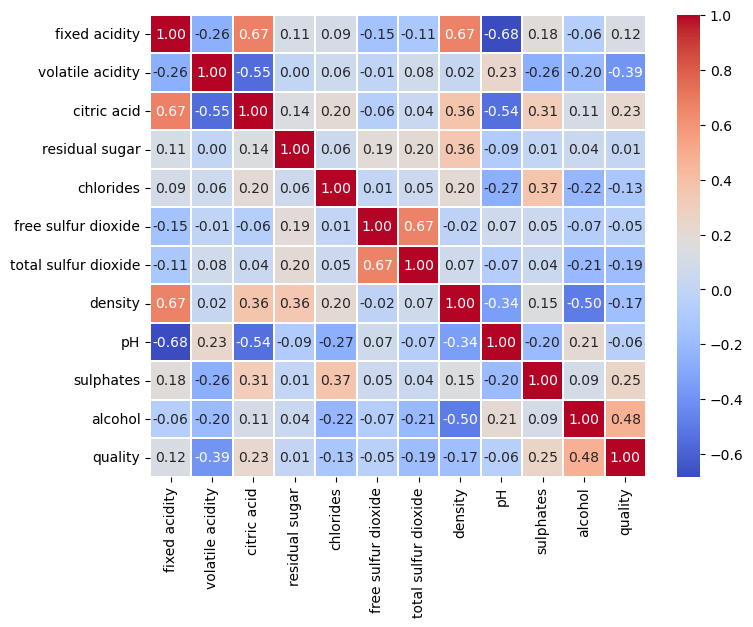

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation,  annot = True, cmap='coolwarm', linewidths=.2, fmt='1.2f')

In [16]:
def plot_feature(feature, target, wine_data):
    plt.figure(figsize=(6, 3))
    sns.set(style="darkgrid")
    plt.suptitle((feature.title() + ' vs. ' + target.title()))
    
    plt.subplot(1, 2, 1)
    sns.distplot(wine_data[feature], bins = 9)
    
    plt.subplot(1, 2, 2)
    sns.barplot(x = target, y = feature, data = wine_data)

In [17]:
cols = list(wine_data.columns)
features = cols[:-1]
target = cols[-1]
print(features)
print(target)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
quality


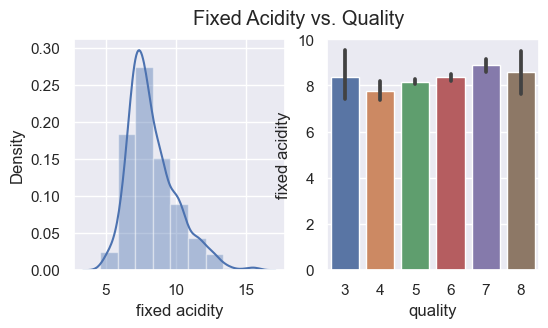

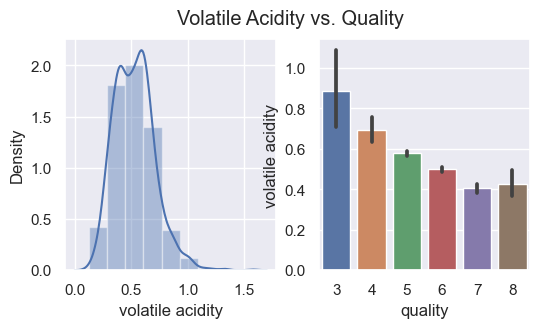

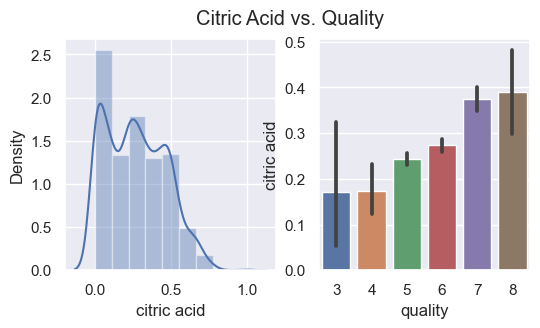

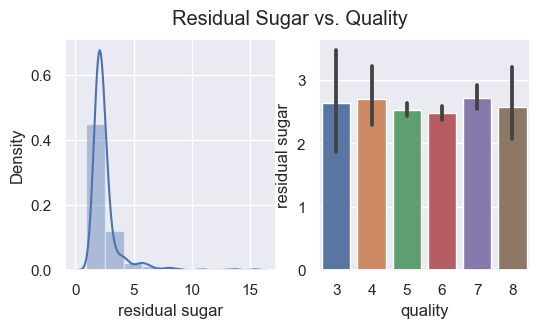

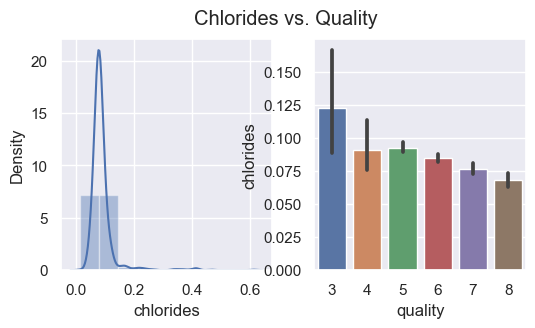

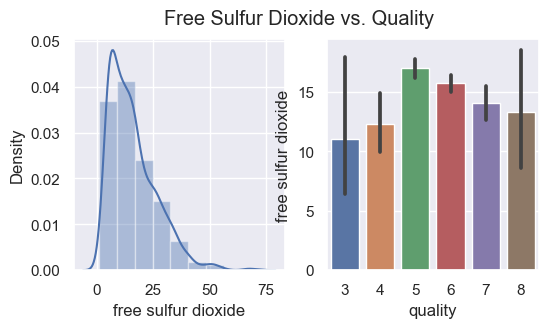

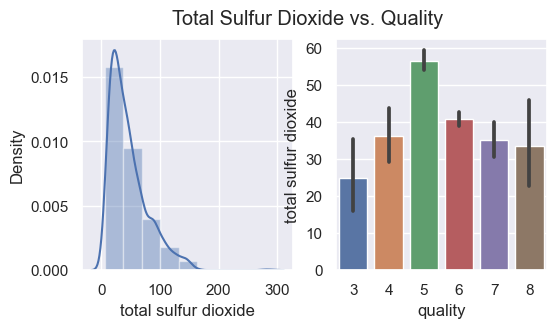

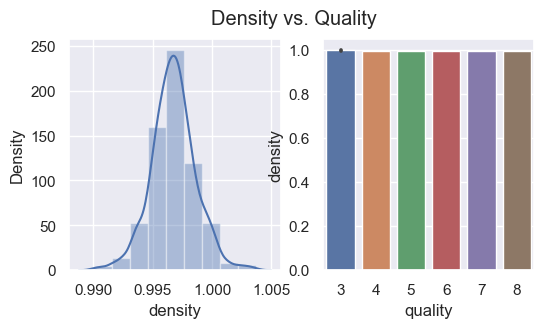

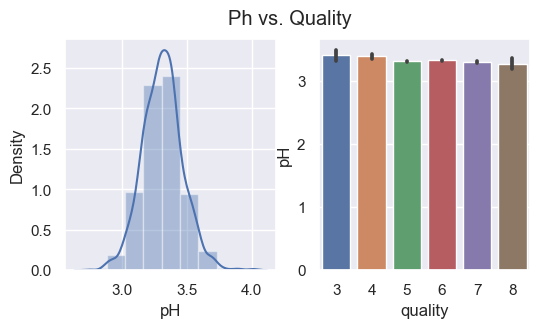

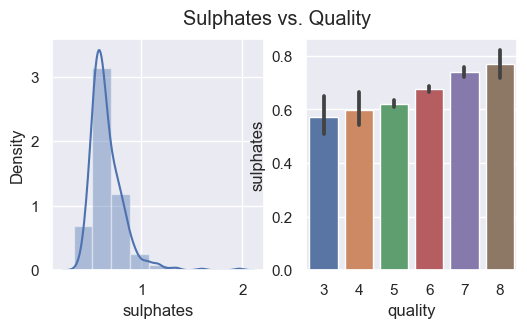

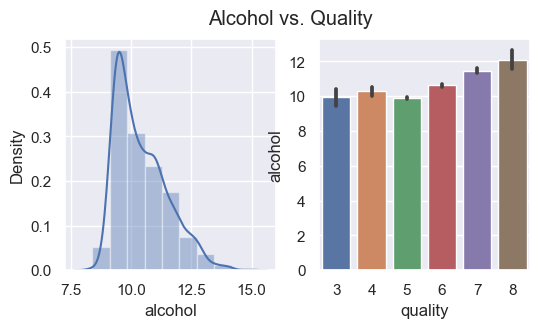

In [18]:
for item in features:
    plot_feature(item, 'quality', wine_data)

In [ ]:
# in heatmap alcohol is positive relation with quality
#  volatile acidity increase quality decrease
#  citric acid increase quality is increase
# in this dataset quality is label

In [29]:
wine_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [30]:
wine_data['quality'] = wine_data['quality'].apply(lambda x: 1 if x > 6 else 0)
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [31]:
print(wine_data['quality'].value_counts())

0    1382
1     217
Name: quality, dtype: int64


In [45]:
X = data.drop(columns = ['quality'])
y = data['quality']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 41)


In [47]:
print("X-train Shape:",x_train.shape)
print("X-test Shape:",x_test.shape)
print("y-train Shape:",y_train.shape)
print("y-test Shape:",y_test.shape)

X-train Shape: (1279, 11)
X-test Shape: (320, 11)
y-train Shape: (1279,)
y-test Shape: (320,)


In [48]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [50]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
def metric_score(clf,x_train,x_test,y_train,y_test ,train=True):
    if train:
        y_pred = clf.predict(x_train)
        
        print("\n==============train Result==============")
        
        print(f"Accuracy score: {accuracy_score(y_train,y_pred) * 100:2f}%")
        
    elif train==False:
        pred = clf.predict(x_test)
        
        print("\n==============test Result==============")
        
        print(f"Accuracy score: {accuracy_score(y_test, pred) * 100:2f}%")
        
        print('\n \n Test Classification Report \n',classification_report(y_test, pred,digits=2))
        

In [52]:
metric_score(clf,x_train,x_test,y_train,y_test,train=True)

metric_score(clf,x_train,x_test,y_train,y_test,train=False)


==============train Result==============
Accuracy score: 86.395622%

==============test Result==============
Accuracy score: 86.250000%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       276
           1       0.00      0.00      0.00        44

    accuracy                           0.86       320
   macro avg       0.43      0.50      0.46       320
weighted avg       0.74      0.86      0.80       320



In [53]:
y_pred =clf.predict(x_test)

confusion_matrix(y_test,y_pred)# create confusion matrix

array([[276,   0],
       [ 44,   0]], dtype=int64)